In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import levene

In [ ]:
#Download the dataset
! gdown 1Vbx-yfHwK7E9JL-M5Bw-A6I2OZHeoKL_

Downloading...
From: https://drive.google.com/uc?id=1Vbx-yfHwK7E9JL-M5Bw-A6I2OZHeoKL_
To: /content/Delhivery.csv
100% 55.6M/55.6M [00:00<00:00, 99.9MB/s]


# Defining Problem:
Data scicence team at Delhivery needs clean data so they can build the forcasting models. As a data analyst we need to clean, sanatize and manipulate raw that we got from data engineering pipleline. We need to analyse the data and extract insignts from it to help data scientists. We also need to deal with outliers, creating new columns by aggregarting, grouping, spliting a few columns, making lables and standardize columns for further use.

In [ ]:
#Read and view the data
df=pd.read_csv('Delhivery.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
# Number of rows and columns
df.shape

(144867, 24)

There are total 144867 rows and 25 columns in the dataset

In [ ]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

Time columns are in object format, we will have to convert it datetime format for further analysis like extraction of year, month, date etc.

In [ ]:
datetime_col=['trip_creation_time', 'od_start_time', 'od_end_time']
for i in datetime_col:
  df[i]=pd.to_datetime(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
#Basic statistical measurement
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [ ]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

There are null values in source_center and destination_name columns. Since the number is small, we can remove the null values.

In [ ]:
df=df.dropna(how='any')
df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [ ]:
# Drop Unknown fields

df.drop(['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

In [ ]:
#Correlation between attributes
df.corr()

<ipython-input-367-012a3110798f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
start_scan_to_end_scan,1.000000,0.784895,0.785788,0.785189,0.784025,0.093397,0.220957,0.308057
actual_distance_to_destination,0.784895,1.000000,0.978683,0.995871,0.997147,0.045588,0.159614,0.232832
actual_time,0.785788,0.978683,1.000000,0.978022,0.979425,0.124549,0.172267,0.243035
osrm_time,0.785189,0.995871,0.978022,1.000000,0.999119,0.050231,0.177813,0.242969
osrm_distance,0.784025,0.997147,0.979425,0.999119,1.000000,0.049055,0.169924,0.240373
segment_actual_time,0.093397,0.045588,0.124549,0.050231,0.049055,1.000000,0.434091,0.449807
segment_osrm_time,0.220957,0.159614,0.172267,0.177813,0.169924,0.434091,1.000000,0.948573
segment_osrm_distance,0.308057,0.232832,0.243035,0.242969,0.240373,0.449807,0.948573,1.000000


<ipython-input-368-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

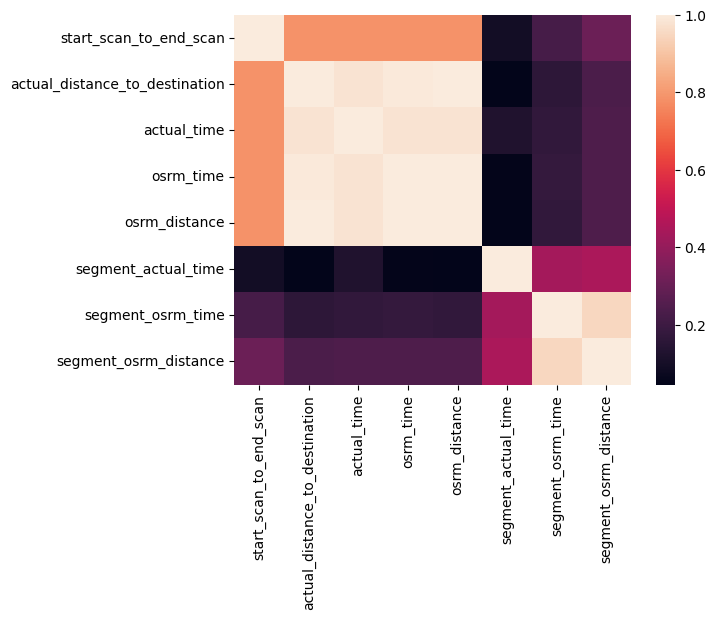

In [ ]:
sns.heatmap(df.corr())

In [ ]:
# Every tirp is divided into multiple sub-trips. We need to merge those rows/details to get clear information. We also need to decide how to deal with other columns that will be merged.
grp=['trip_uuid', 'source_center', 'destination_center']
df=df.groupby(grp, as_index=False).agg({'data': 'first', 'trip_creation_time': 'first', 'route_type': 'first', 'source_name': 'first',
                                         'destination_name': 'last', 'od_start_time': 'first', 'od_end_time': 'first', 'start_scan_to_end_scan': 'first',
                                         'actual_distance_to_destination': 'last', 'actual_time': 'last', 'osrm_time': 'last', 'osrm_distance': 'last',
                                         'segment_actual_time': 'sum', 'segment_osrm_time': 'sum', 'segment_osrm_distance': 'sum'})

In [ ]:
df.shape

(26222, 18)

In [ ]:
#Checking if we still have duplicate trips
duplicate=df[df['trip_uuid'].duplicated()]
duplicate.head()

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
5,trip-153671043369099517,IND562132AAA,IND000000ACB,training,2018-09-12 00:00:33.691250,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270
8,trip-153671052974046625,IND583119AAA,IND583101AAA,training,2018-09-12 00:02:09.740725,FTL,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-09-12 03:54:43.114421,2018-09-12 12:00:30.683231,485.0,41.317614,131.0,44.0,53.5761,130.0,44.0,53.5761
9,trip-153671052974046625,IND583201AAA,IND583119AAA,training,2018-09-12 00:02:09.740725,FTL,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 02:34:10.515593,2018-09-12 03:54:43.114421,80.0,26.600536,63.0,27.0,29.5696,63.0,26.0,29.5697


In [ ]:
df[df['trip_uuid']=='trip-153671041653548748']

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528


In [ ]:
df['od_total_time']= df['od_end_time'] - df['od_start_time']
df['od_total_time']=df['od_total_time'].apply(lambda x: round(x.total_seconds()/60,2))
df.drop(['od_start_time', 'od_start_time'], axis=1, inplace=True)
df['od_total_time'].head()

0    1260.60
1     999.51
2      58.83
3     122.78
4     834.64
Name: od_total_time, dtype: float64

In [ ]:
df=df.groupby('trip_uuid', as_index=False).agg({'data': 'first', 'trip_creation_time': 'first', 'route_type': 'first', 'source_name': 'first',
                                         'destination_name': 'last', 'od_total_time': 'sum', 'start_scan_to_end_scan': 'sum',
                                         'actual_distance_to_destination': 'sum', 'actual_time': 'sum', 'osrm_time': 'sum', 'osrm_distance': 'sum',
                                         'segment_actual_time': 'sum', 'segment_osrm_time': 'sum', 'segment_osrm_distance': 'sum'})

In [ ]:
df

,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,Carting,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),258.03,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),60.59,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,Carting,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),422.12,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866
14785,trip-153861115439069069,test,2018-10-03 23:59:14.390954,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),348.52,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324


# Feature Engineering



In [ ]:
# Statistical details of the numerical columns
df.describe(include='object').T

,count,unique,top,freq
trip_uuid,14787,14787,trip-153671041653548748,1
data,14787,2,training,10645
route_type,14787,2,Carting,8906
source_name,14787,930,Gurgaon_Bilaspur_HB (Haryana),1052
destination_name,14787,1035,Gurgaon_Bilaspur_HB (Haryana),821
trip_time,14787,14787,00:00:16.535741,1
trip_date,14787,22,2018-09-18,791
source_state,14787,29,Maharashtra,2714
source_city,14787,730,Bengaluru,1700
source_place,14787,707,Bilaspur,1074


In [ ]:
# Statistical details of the numerical columns
df.describe(include='float').T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14787.0,530.313468,658.415416,23.460000,149.695000,279.710000,633.535000,7898.550000
start_scan_to_end_scan,14787.0,529.429025,658.254936,23.000000,149.000000,279.000000,632.000000,7898.000000
actual_distance_to_destination,14787.0,164.090196,305.502982,9.002461,22.777099,48.287894,163.591258,2186.531787
actual_time,14787.0,356.306012,561.517936,9.000000,67.000000,148.000000,367.000000,6265.000000
osrm_time,14787.0,160.990938,271.459495,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14787.0,203.887411,370.565564,9.072900,30.756900,65.302800,206.644200,2840.081000
segment_actual_time,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_time,14787.0,180.511598,314.679279,6.000000,30.000000,65.000000,184.000000,2564.000000
segment_osrm_distance,14787.0,222.705466,416.846279,9.072900,32.578850,69.784200,216.560600,3523.632400


In [ ]:
# Creating new columns for date, month, year, time
df['trip_time']=df['trip_creation_time'].dt.time
df['trip_date']=df['trip_creation_time'].dt.date
df['month']=df['trip_creation_time'].dt.month
df['year']=df['trip_creation_time'].dt.year
df['hour']=df['trip_creation_time'].dt.hour

In [ ]:
df.head()

,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_time,trip_date,month,year,hour
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,00:00:16.535741,2018-09-12,9,2018,0
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,00:00:22.886430,2018-09-12,9,2018,0
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,00:00:33.691250,2018-09-12,9,2018,0
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,00:01:00.113710,2018-09-12,9,2018,0
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,00:02:09.740725,2018-09-12,9,2018,0


In [ ]:
# Function to extract state
def state(x):
  s=x.split('(')
  state= s[1].strip(')')
  return state


# Function to extract city
def city(y):
  c=y.split('_')
  city= c[0]
  return city

# Function to extract place
def place(z):
  p=z.split('_')
  if len(p)<2:
    return "Unknown"
  else:
    pl= p[1]
    place=pl.split('(',1)[0]
    return place


df['source_state']=df['source_name'].apply(state)
df['source_city']=df['source_name'].apply(city)
df['source_place']=df['source_name'].apply(place)
df['destination_state']=df['destination_name'].apply(state)
df['destination_city']=df['destination_name'].apply(city)
df['destination_place']=df['destination_name'].apply(place)

In [ ]:
df.head()

,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,trip_date,month,year,hour,source_state,source_city,source_place,destination_state,destination_city,destination_place
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732854,1562.0,...,2018-09-12,9,2018,0,Uttar Pradesh,Kanpur,Central,Uttar Pradesh,Kanpur,Central
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186911,143.0,...,2018-09-12,9,2018,0,Karnataka,Doddablpur,ChikaDPP,Karnataka,Doddablpur,ChikaDPP
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404273,3347.0,...,2018-09-12,9,2018,0,Haryana,Gurgaon,Bilaspur,Haryana,Gurgaon,Bilaspur
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,...,2018-09-12,9,2018,0,Maharashtra,Mumbai Hub (Maharashtra),Unknown,Maharashtra,Mumbai,MiraRd
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448500,341.0,...,2018-09-12,9,2018,0,Karnataka,Bellary,Dc,Karnataka,Sandur,WrdN1DPP


In [ ]:
df['source_city']=df['source_city'].replace('Bangalore', 'Bengaluru')
df['destination_city']=df['destination_city'].replace('Bangalore', 'Bengaluru')

# Outlier Analysis

<Axes: >

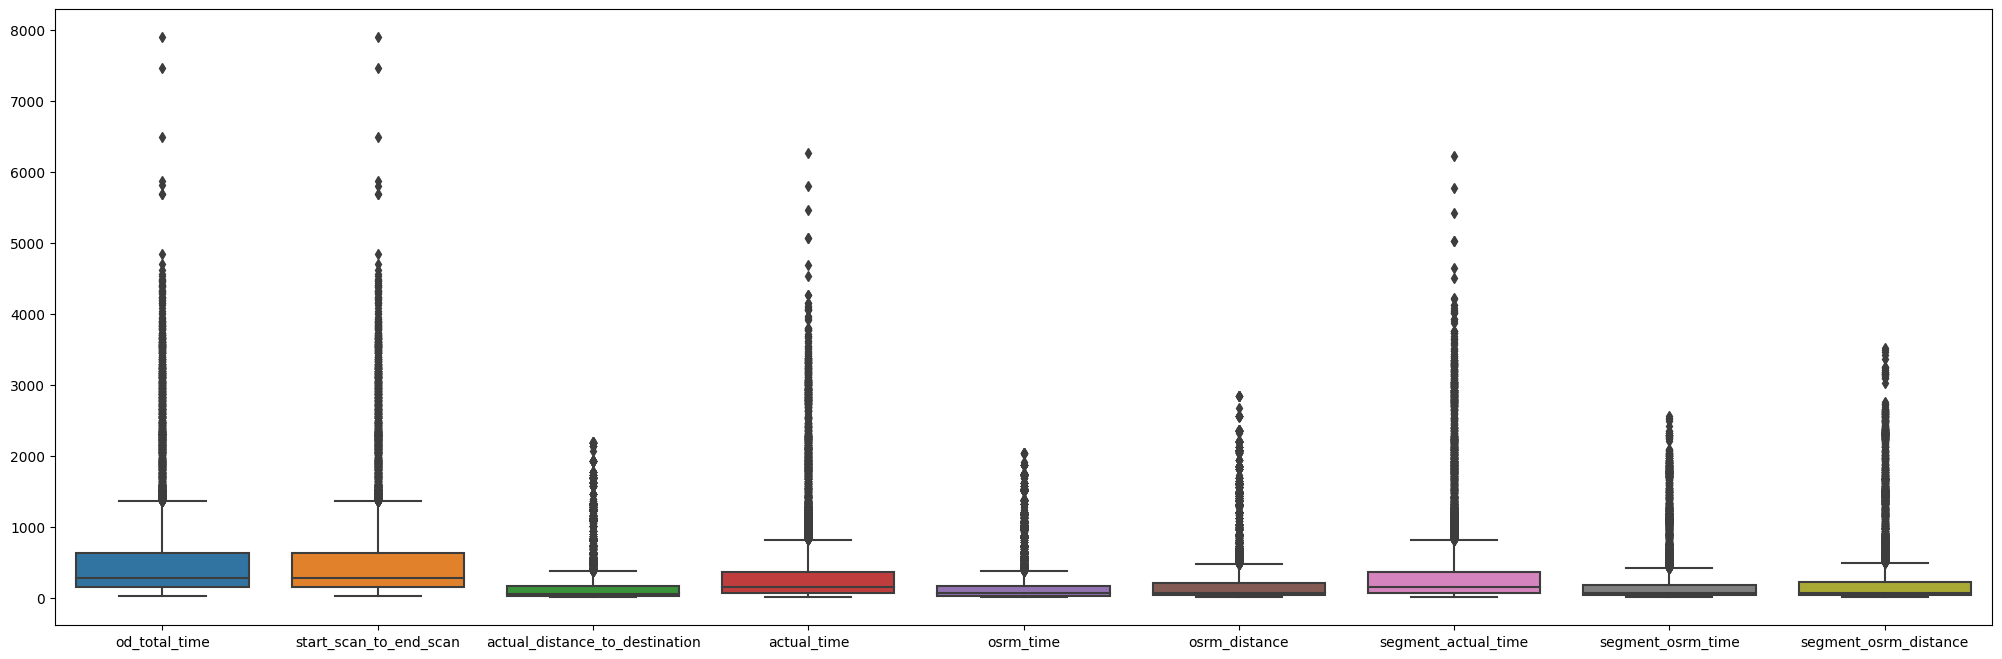

In [ ]:
numerical= ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance',
            'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']

plt.figure(figsize=(25,8))
sns.boxplot(df[numerical])

In [ ]:
# There are a lot of outliers in the numerical columns. We can use IQR method to deal with these outliers
for i in numerical:
  q1=np.quantile(df[i],0.25)
  q3=np.quantile(df[i],0.75)
  IQR=q3-q1
  lower_band=q1-(1.5*IQR)
  upper_band=q3+(1.5*IQR)
  outliers= df[(df[i]<lower_band) | (df[i]>upper_band)]

  print('Column: ',i)
  print('q1: ', q1)
  print('q3: ', q3)
  print('IQR: ', IQR)
  print('Lower Band: ', lower_band)
  print('Upper Band: ', upper_band)
  print('No. of Outliers: ', outliers.shape[0])
  print()

Column:  od_total_time
q1:  149.695
q3:  633.535
IQR:  483.84
Lower Band:  -576.065
Upper Band:  1359.295
No. of Outliers:  1275

Column:  start_scan_to_end_scan
q1:  149.0
q3:  632.0
IQR:  483.0
Lower Band:  -575.5
Upper Band:  1356.5
No. of Outliers:  1282

Column:  actual_distance_to_destination
q1:  22.777098943155323
q3:  163.5912581579725
IQR:  140.81415921481718
Lower Band:  -188.44413987907043
Upper Band:  374.81249698019826
No. of Outliers:  1452

Column:  actual_time
q1:  67.0
q3:  367.0
IQR:  300.0
Lower Band:  -383.0
Upper Band:  817.0
No. of Outliers:  1646

Column:  osrm_time
q1:  29.0
q3:  168.0
IQR:  139.0
Lower Band:  -179.5
Upper Band:  376.5
No. of Outliers:  1506

Column:  osrm_distance
q1:  30.7569
q3:  206.6442
IQR:  175.8873
Lower Band:  -233.07405000000003
Upper Band:  470.47515000000004
No. of Outliers:  1522

Column:  segment_actual_time
q1:  66.0
q3:  364.0
IQR:  298.0
Lower Band:  -381.0
Upper Band:  811.0
No. of Outliers:  1644

Column:  segment_osrm_time
q

We won't be removing these outliers at this point as these are high in number. We will have to look indept to decide the final procedure to deal with these outliers.

# EDA and Visual Analysis

In [ ]:
df.head()

,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,trip_date,month,year,hour,source_state,source_city,source_place,destination_state,destination_city,destination_place
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732854,1562.0,...,2018-09-12,9,2018,0,Uttar Pradesh,Kanpur,Central,Uttar Pradesh,Kanpur,Central
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186911,143.0,...,2018-09-12,9,2018,0,Karnataka,Doddablpur,ChikaDPP,Karnataka,Doddablpur,ChikaDPP
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404273,3347.0,...,2018-09-12,9,2018,0,Haryana,Gurgaon,Bilaspur,Haryana,Gurgaon,Bilaspur
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,...,2018-09-12,9,2018,0,Maharashtra,Mumbai Hub (Maharashtra),Unknown,Maharashtra,Mumbai,MiraRd
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448500,341.0,...,2018-09-12,9,2018,0,Karnataka,Bellary,Dc,Karnataka,Sandur,WrdN1DPP


In [ ]:
# Percentage of data in the dataset
df['data'].value_counts(normalize=True)*100

training    71.988909
test        28.011091
Name: data, dtype: float64

72% of the data is training data and remailing 28% of the data is the test data

In [ ]:
# Different types of route and its count
df['route_type'].value_counts().reset_index().rename({'index': 'Route_Type', 'route_type': 'Count'},axis=1)

,Route_Type,Count
0,Carting,8906
1,FTL,5881


In [ ]:
# Number of trips created every hour
df['hour'].value_counts().reset_index().rename({'index': 'Hour', 'hour': 'Count'},axis=1)

,Hour,Count
0,22,1123
1,23,1107
2,20,1080
3,0,991
4,21,872
5,19,837
6,1,748
7,2,702
8,18,696
9,3,651


In [ ]:
# Distribution of trips created per source state
df['source_state'].value_counts().reset_index().rename({'index': 'Source_State', 'source_state': 'Count'},axis=1)

,Source_State,Count
0,Maharashtra,2714
1,Karnataka,2143
2,Haryana,1823
3,Tamil Nadu,1039
4,Telangana,784
5,Uttar Pradesh,760
6,Gujarat,750
7,Delhi,725
8,West Bengal,665
9,Punjab,536


In [ ]:
# Distribution of trips created per destination state
df['destination_state'].value_counts().reset_index().rename({'index': 'Destination_State', 'destination_state': 'Count'},axis=1).head()

,Destination_State,Count
0,Maharashtra,2561
1,Karnataka,2294
2,Haryana,1640
3,Tamil Nadu,1084
4,Uttar Pradesh,805


In [ ]:
# Distribution of trips created per source city
df['source_city'].value_counts().reset_index().rename({'index': 'Source_City', 'source_city': 'Count'},axis=1).head()

,Source_City,Count
0,Bengaluru,1700
1,Gurgaon,1128
2,Bhiwandi,697
3,Mumbai,654
4,Delhi,548


In [ ]:
# Distribution of trips created per destination city
df['destination_city'].value_counts().reset_index().rename({'index': 'Destination_City', 'source_city': 'Count'},axis=1).head()

,Destination_City,destination_city
0,Bengaluru,1639
1,Mumbai,966
2,Gurgaon,877
3,Delhi,554
4,Hyderabad,499


In [ ]:
# Distribution of trips across months
df['month'].value_counts().reset_index().rename({'index': 'Month', 'month': 'Count'},axis=1).head()

,Month,Count
0,9,13011
1,10,1776


<Axes: xlabel='hour', ylabel='count'>

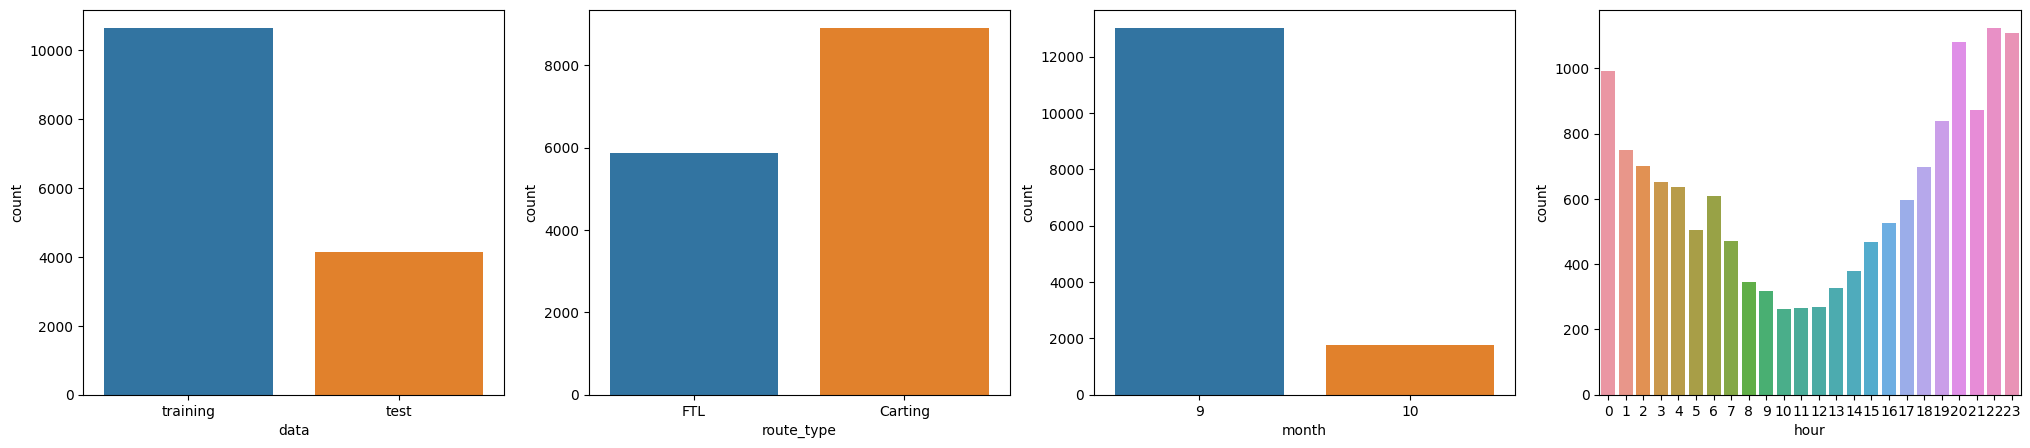

In [ ]:
# Graphical representation of count of data and route type
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.countplot(x=df['data'])

plt.subplot(1,4,2)
sns.countplot(x=df['route_type'])

plt.subplot(1,4,3)
sns.countplot(x=df['month'])

plt.subplot(1,4,4)
sns.countplot(x=df['hour'])

<Axes: xlabel='count', ylabel='source_state'>

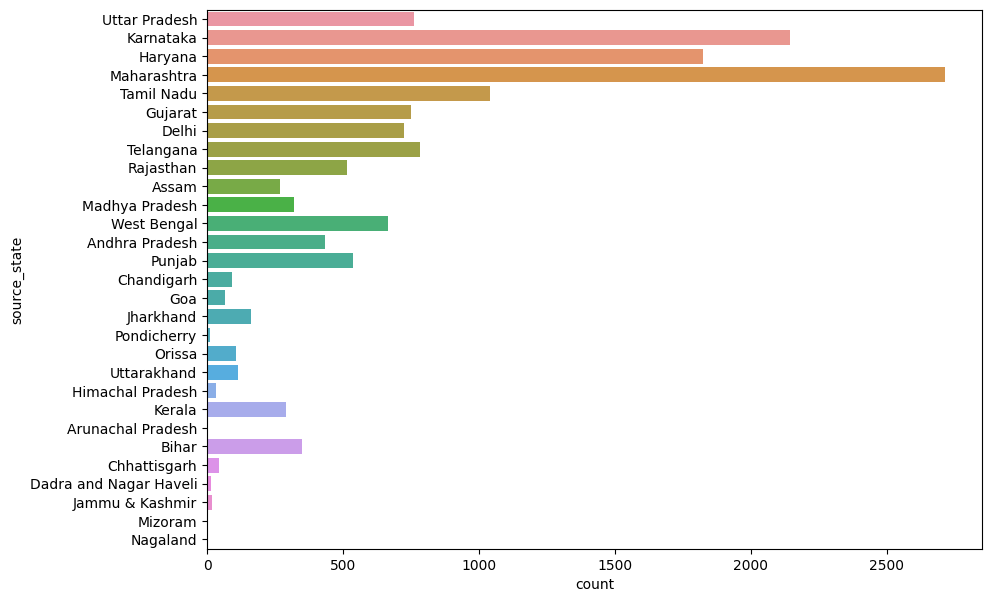

In [ ]:
# Countplot for state wise source distribution
plt.figure(figsize=(10,7))
sns.countplot(y=df['source_state'])

<Axes: xlabel='count', ylabel='destination_state'>

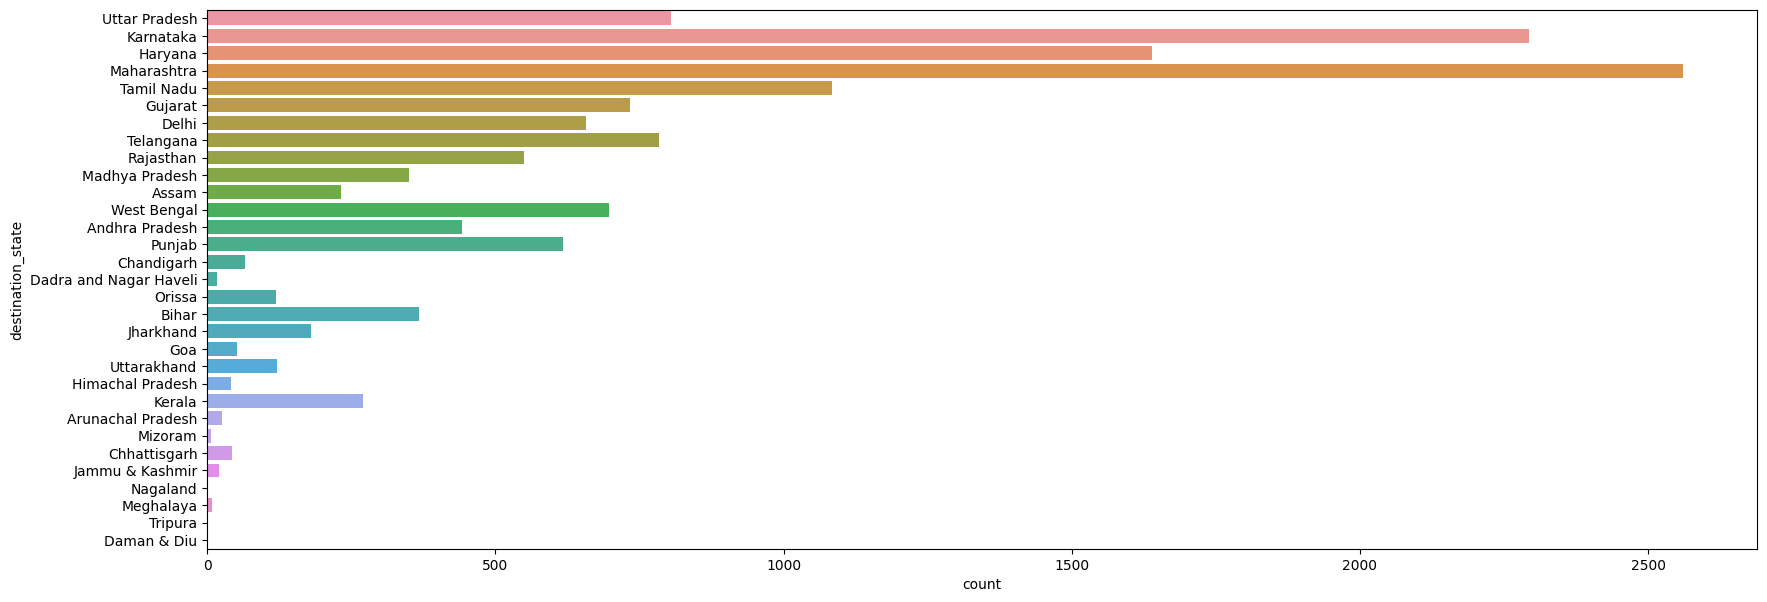

In [ ]:
# Countplot for state wise destination distribution
plt.figure(figsize=(20,7))
sns.countplot(y=df['destination_state'])

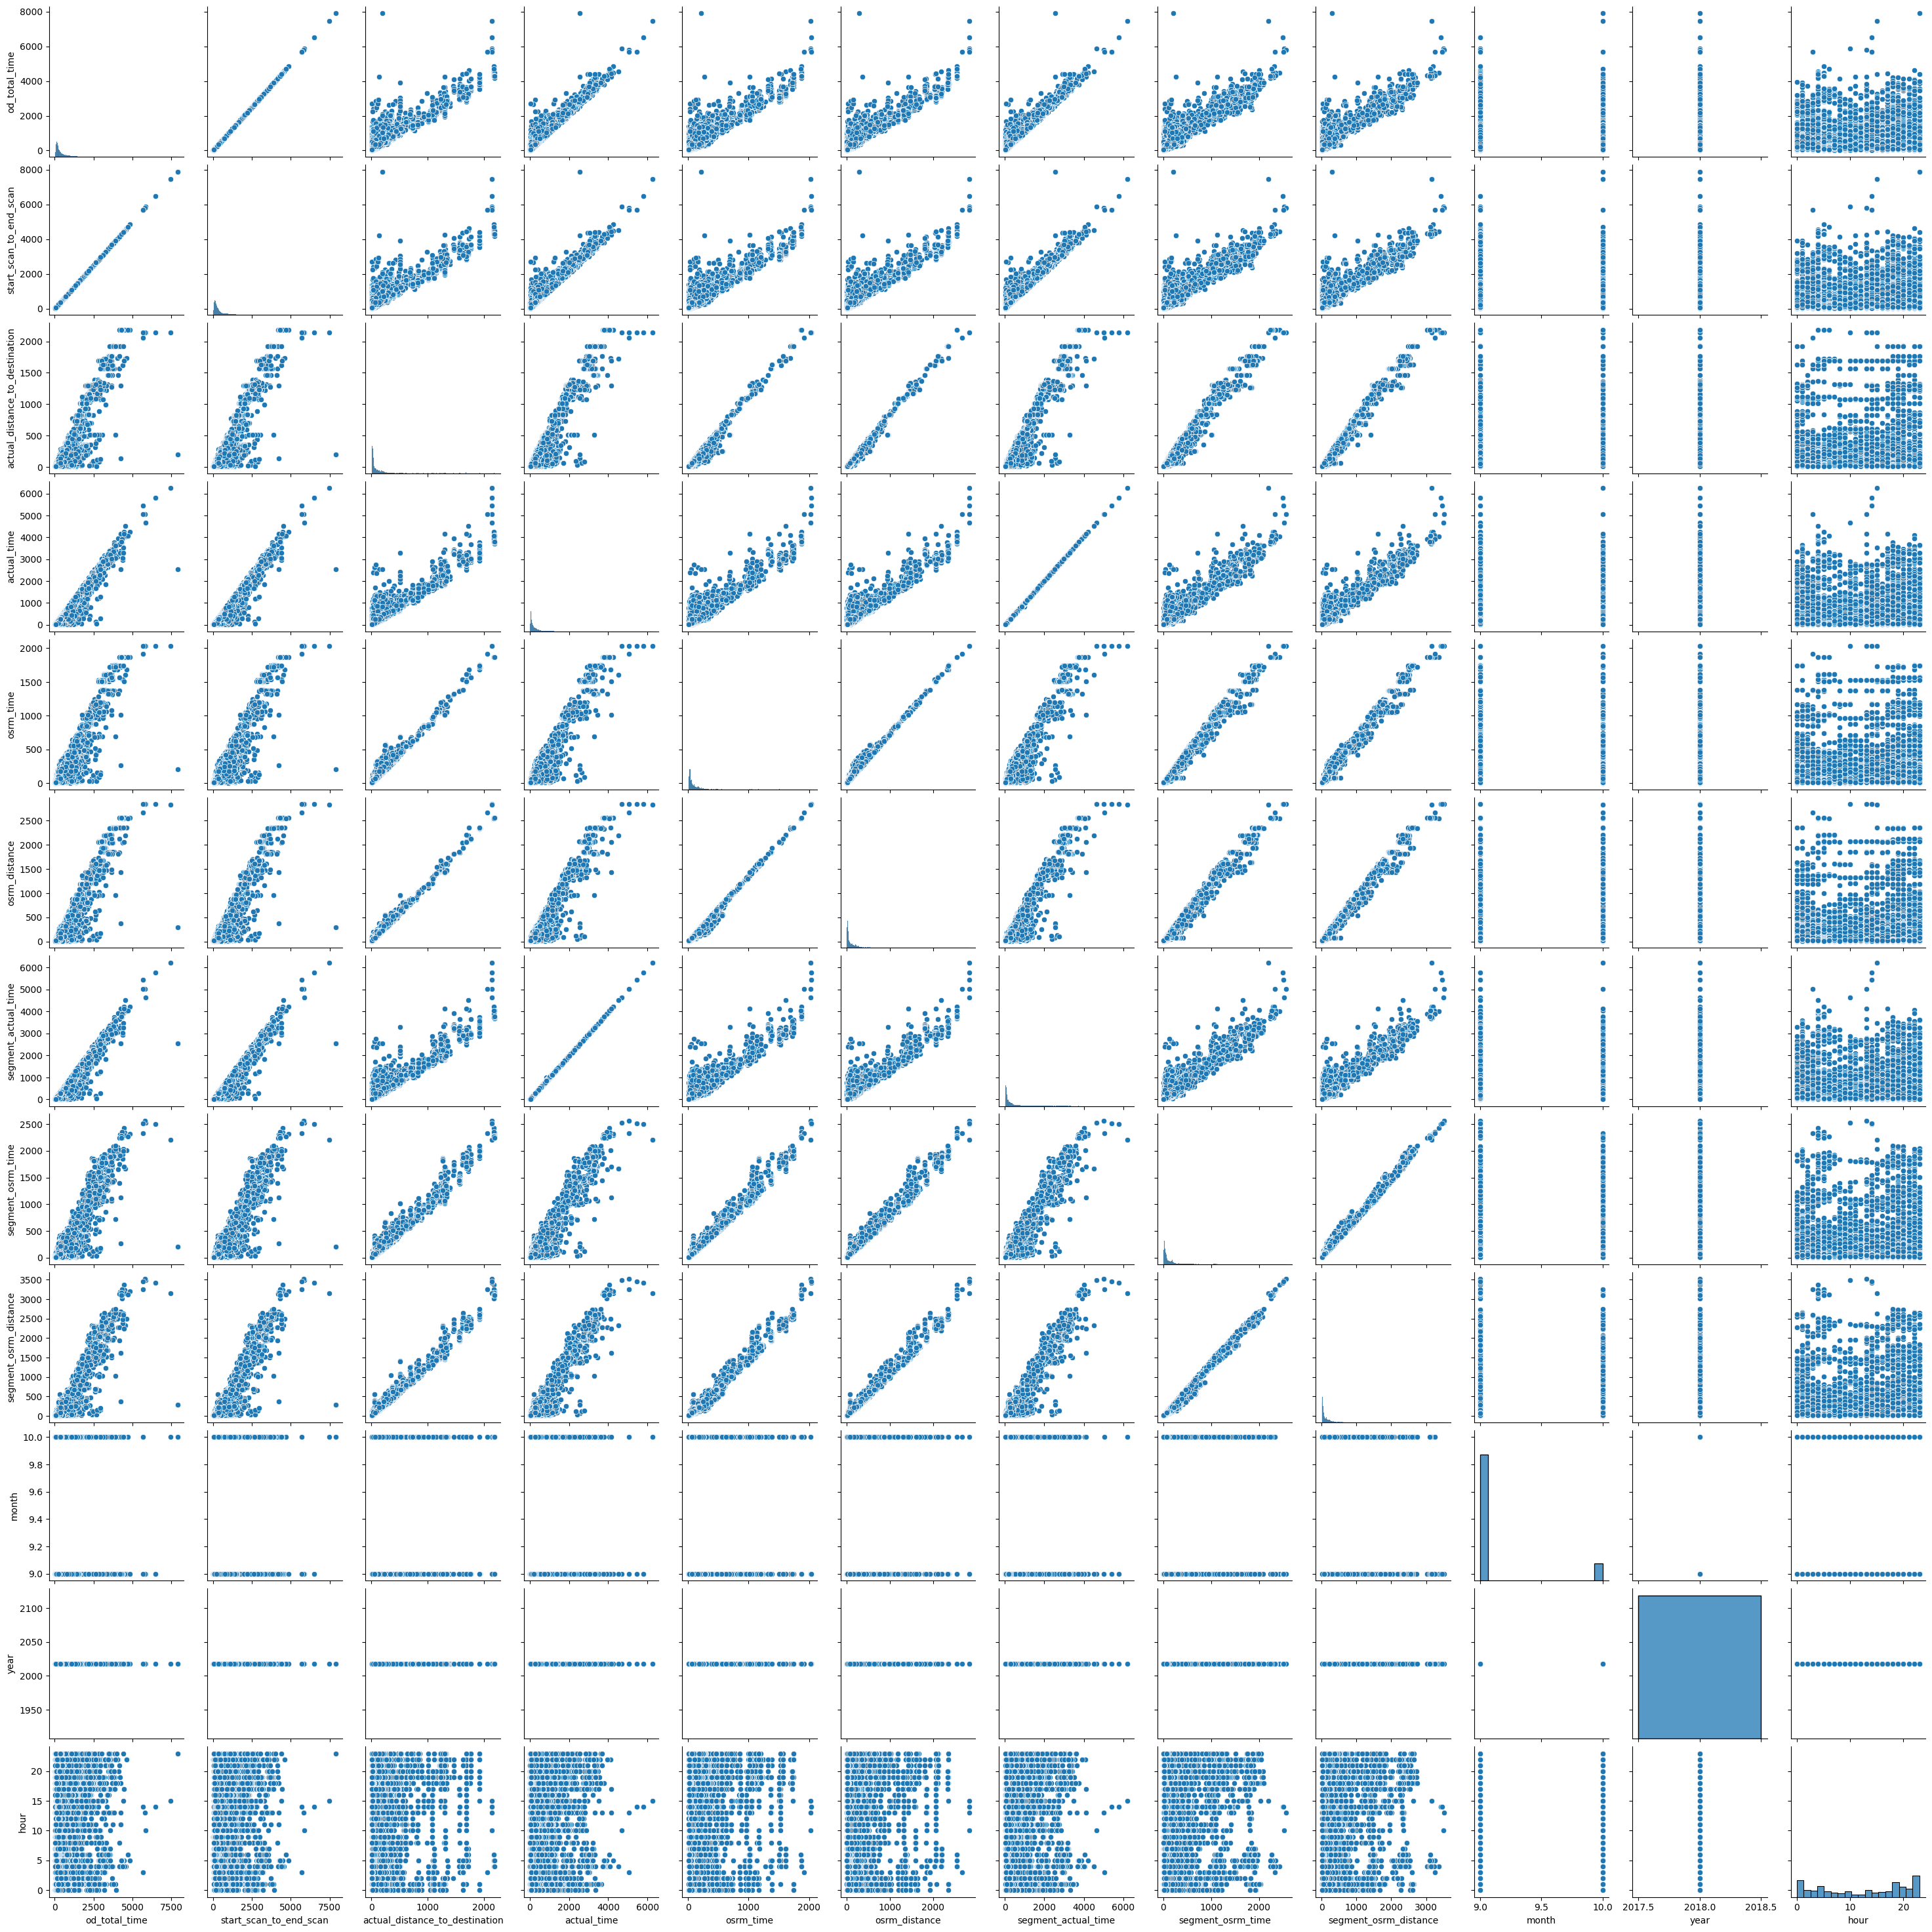

In [ ]:
sns.pairplot(df)

In [ ]:
df.head()

,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,trip_date,month,year,hour,source_state,source_city,source_place,destination_state,destination_city,destination_place
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732854,1562.0,...,2018-09-12,9,2018,0,Uttar Pradesh,Kanpur,Central,Uttar Pradesh,Kanpur,Central
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186911,143.0,...,2018-09-12,9,2018,0,Karnataka,Doddablpur,ChikaDPP,Karnataka,Doddablpur,ChikaDPP
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404273,3347.0,...,2018-09-12,9,2018,0,Haryana,Gurgaon,Bilaspur,Haryana,Gurgaon,Bilaspur
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,...,2018-09-12,9,2018,0,Maharashtra,Mumbai Hub (Maharashtra),Unknown,Maharashtra,Mumbai,MiraRd
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448500,341.0,...,2018-09-12,9,2018,0,Karnataka,Bellary,Dc,Karnataka,Sandur,WrdN1DPP


# Hypothesis Testing

1. Compare od_total_time to start_scan_to_end_scan



*Here we set the null and alternate hypothesis as below:*

*H0 = od_total_time to start_scan_to_end_scan are the same*

*H1 = od_total_time to start_scan_to_end_scan are different*

*Let us assume the standard significance level for the hypothesis i.e., 5%*

[]

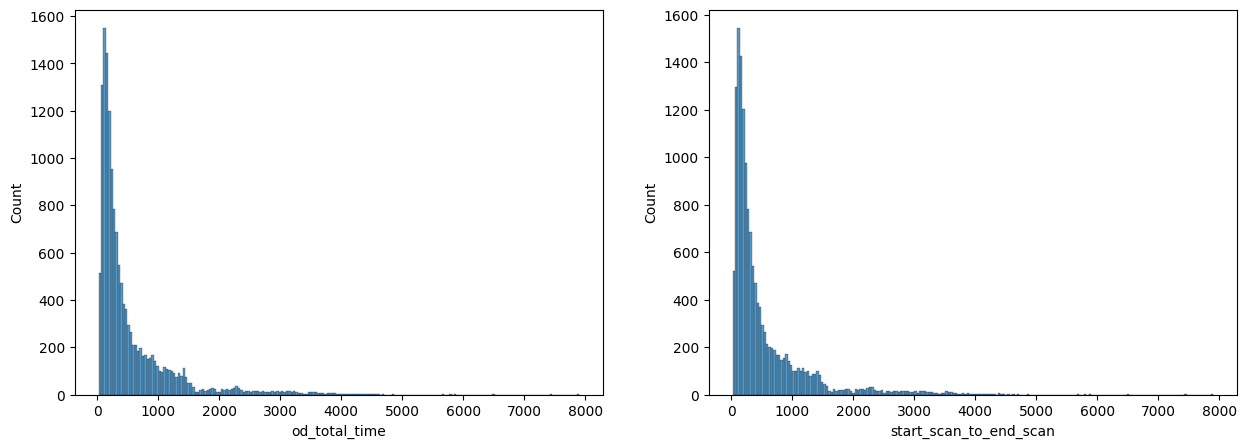

In [ ]:
# Visual distribution of od_total_time to start_scan_to_end_scan
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df['od_total_time'])

plt.subplot(1,2,2)
sns.histplot(data=df['start_scan_to_end_scan'])
plt.plot()

We can see that data is not nomally distribited but is right skewed

In [ ]:
# Check if the data is Gaussian Distribution or not using shapiro test
'''
Here we will use Shapiro test to check the gaussian distribution assuming that the data is independent and identically distributed

H0 = Data has Gaussian Distribution
H1 = Data does not have Gaussian Distribution
alpha = 0.05
'''
alpha=0.05

statistics_1,p_value_1= shapiro(df['od_total_time'].sample(5000))

print('statistics=',statistics_1)
print('p_value=',p_value_1)

if p_value_1>alpha:
  print('The sample has Gaussian Distribution')
else:
  print('The sample does not have Gaussian Distribution')

statistics= 0.6624689102172852
p_value= 0.0
The sample does not have Gaussian Distribution


In [ ]:
alpha=0.05

statistics_2,p_value_2= shapiro(df['start_scan_to_end_scan'].sample(5000))

print('statistics=',statistics_2)
print('p_value=',p_value_2)

if p_value_2>alpha:
  print('The sample has Gaussian Distribution')
else:
  print('The sample does not have Gaussian Distribution')

statistics= 0.6647787094116211
p_value= 0.0
The sample does not have Gaussian Distribution


In [ ]:
# Check variance of the data
'''
We will use Levene Test to check the variance of the two dataset

H0 = Variances are equal
H1 = Variances are not equal
'''
alpha=0.05

statistics_var,p_value_var= levene(df['od_total_time'], df['start_scan_to_end_scan'])

print('statistics=',statistics_var)
print('p_value=',p_value_var)

if p_value_var>alpha:
  print('We fail to reject the null hypothesis. Hence, variances are equal')
else:
  print('Reject null hypothesis. Variances are not equal')

statistics= 0.001692862619038965
p_value= 0.9671810468715469
We fail to reject the null hypothesis. Hence, variances are equal


Since the distribution is not normal, we will use Mann-Whitney U rank test for the hypothesis testing

In [ ]:
# Mann-Whitney U Rank Test
'''
H0 = od_total_time to start_scan_to_end_scan are the same
H1 = od_total_time to start_scan_to_end_scan are different
alpha = 0.05

'''
from scipy.stats import mannwhitneyu

alpha=0.05

u_stat,p_value_mann= mannwhitneyu(df['od_total_time'], df['start_scan_to_end_scan'])

print('statistics=',u_stat)
print('p_value=',p_value_mann)

if p_value_mann>alpha:
  print('We fail to reject the null hypothesis. Hence, od_total_time to start_scan_to_end_scan are the same')
else:
  print('We reject the null hypothesis. od_total_time to start_scan_to_end_scan are different')

statistics= 109531832.0
p_value= 0.780940379505003
We fail to reject the null hypothesis. Hence, od_total_time to start_scan_to_end_scan are the same


In the Mann Whitney U Test, the p_value is greater than the alpha value 0.05. Hence, we can conclude that the od_total_time to start_scan_to_end_scan are same.

2. Compare actual_time to osrm_time



*Here we set the null and alternate hypothesis as below:*

*H0 = actual_time and osrm_time are the same*

*H1 = actual_time and osrm_time are different*

*Let us assume the standard significance level for the hypothesis i.e., 5%*

[]

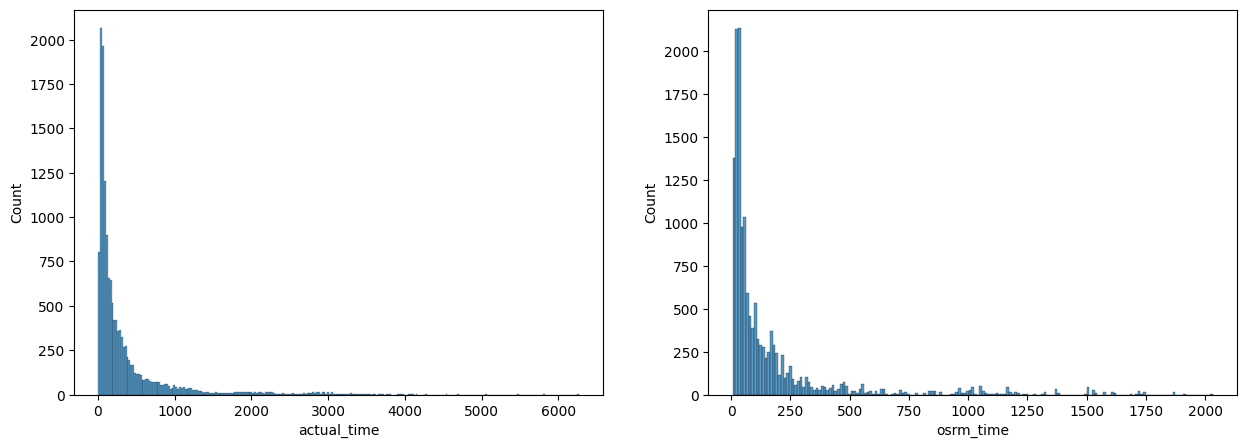

In [ ]:
# Visual distribution of actual_time to osrm_time
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df['actual_time'])

plt.subplot(1,2,2)
sns.histplot(data=df['osrm_time'])
plt.plot()

We can see that data is not nomally distribited but is right skewed

In [ ]:
# Check if the data is Gaussian Distribution or not using shapiro test
'''
Here we will use Shapiro test to check the gaussian distribution assuming that the data is independent and identically distributed

H0 = Data has Gaussian Distribution
H1 = Data does not have Gaussian Distribution
alpha = 0.05
'''
alpha=0.05

statistics_3,p_value_3= shapiro(df['actual_time'].sample(5000))

print('statistics=',statistics_3)
print('p_value=',p_value_3)

if p_value_3>alpha:
  print('The sample has Gaussian Distribution')
else:
  print('The sample does not have Gaussian Distribution')

statistics= 0.578562319278717
p_value= 0.0
The sample does not have Gaussian Distribution


In [ ]:
alpha=0.05

statistics_4,p_value_4= shapiro(df['osrm_time'].sample(5000))

print('statistics=',statistics_4)
print('p_value=',p_value_4)

if p_value_4>alpha:
  print('The sample has Gaussian Distribution')
else:
  print('The sample does not have Gaussian Distribution')

statistics= 0.5541114807128906
p_value= 0.0
The sample does not have Gaussian Distribution


In [ ]:
# Check variance of the data
'''
We will use Levene Test to check the variance of the two dataset

H0 = Variances are equal
H1 = Variances are not equal
'''
alpha=0.05

statistics_var1,p_value_var1= levene(df['actual_time'], df['osrm_time'])

print('statistics=',statistics_var1)
print('p_value=',p_value_var1)

if p_value_var1>alpha:
  print('We fail to reject the null hypothesis. Hence, variances are equal')
else:
  print('Reject null hypothesis. Variances are not equal')

statistics= 1013.8463480511717
p_value= 8.743536461316657e-219
Reject null hypothesis. Variances are not equal


Since the distribution is not normal and the variance is not equal, we will use Mann-Whitney U rank test for the hypothesis testing

In [ ]:
# Mann-Whitney U Rank Test
'''
H0 = actual_time and osrm_time are the same
H1 = actual_time and osrm_time are different
alpha = 0.05

'''
from scipy.stats import mannwhitneyu

alpha=0.05

u_stat1,p_value_mann1= mannwhitneyu(df['actual_time'], df['osrm_time'])

print('statistics=',u_stat1)
print('p_value=',p_value_mann1)

if p_value_mann1>alpha:
  print('We fail to reject the null hypothesis. Hence, actual_time and osrm_time are the same')
else:
  print('We reject the null hypothesis. Hence, actual_time and osrm_time are different')

statistics= 152176575.5
p_value= 0.0
We reject the null hypothesis. Hence, actual_time and osrm_time are different


In the Mann Whitney U Test, the p_value is greater than the alpha value 0.05. Hence, we can conclude that the actual_time and osrm_time are different.

3. Compare actual_time to segment_actual_time



*Here we set the null and alternate hypothesis as below:*

*H0 = actual_time and segment_actual_time are the same*

*H1 = actual_time are segment_actual_time are different*

*Let us assume the standard significance level for the hypothesis i.e., 5%*

[]

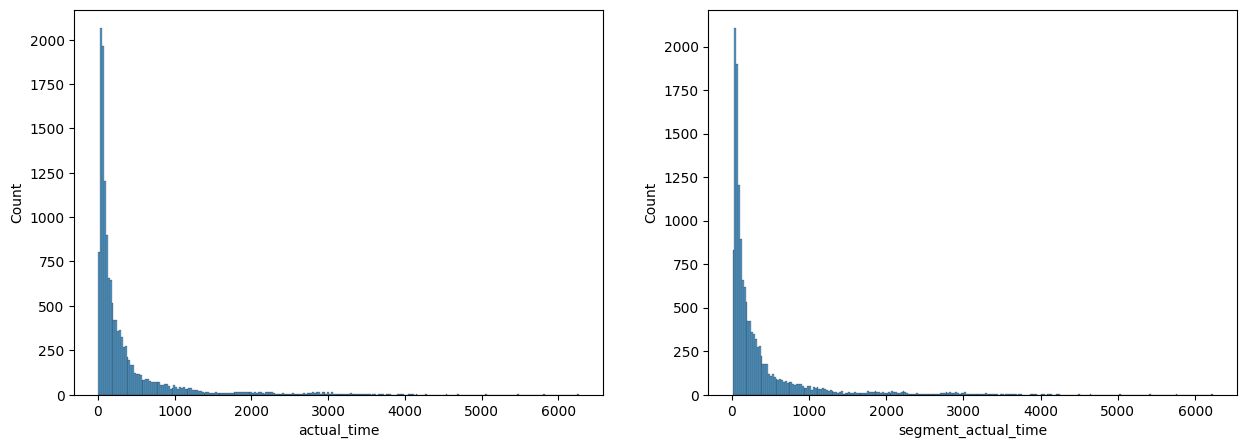

In [ ]:
# Visual distribution of actual_time to osrm_time
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df['actual_time'])

plt.subplot(1,2,2)
sns.histplot(data=df['segment_actual_time'])
plt.plot()

In [ ]:
# Check if the data is Gaussian Distribution or not using shapiro test
'''
Here we will use Shapiro test to check the gaussian distribution assuming that the data is independent and identically distributed

H0 = Data has Gaussian Distribution
H1 = Data does not have Gaussian Distribution
alpha = 0.05
'''
alpha=0.05

statistics_5,p_value_5= shapiro(df['segment_actual_time'].sample(5000))

print('statistics=',statistics_5)
print('p_value=',p_value_5)

if p_value_5>alpha:
  print('The sample has Gaussian Distribution')
else:
  print('The sample does not have Gaussian Distribution')

statistics= 0.5773236751556396
p_value= 0.0
The sample does not have Gaussian Distribution


As we have already seen that actual_time data does not follow normal distribution, so here we have done only segment_actual_time's shapiro test which turns out to the the same i.e., it is not normally distribuated.

In [ ]:
# Check variance of the data
'''
We will use Levene Test to check the variance of the two dataset

H0 = Variances are equal
H1 = Variances are not equal
'''
alpha=0.05

statistics_var2,p_value_var2= levene(df['actual_time'], df['segment_actual_time'])

print('statistics=',statistics_var2)
print('p_value=',p_value_var2)

if p_value_var2>alpha:
  print('We fail to reject the null hypothesis. Hence, variances are equal')
else:
  print('Reject null hypothesis. Variances are not equal')

statistics= 0.1523862392501683
p_value= 0.6962681452003544
We fail to reject the null hypothesis. Hence, variances are equal


Since the distribution is not normal and the variance is not equal, we will use Mann-Whitney U rank test for the hypothesis testing

In [ ]:
# Mann-Whitney U Rank Test
'''
H0 = actual_time and segment_actual_time are the same
H1 = actual_time and segment_actual_time are different
alpha = 0.05

'''
from scipy.stats import mannwhitneyu

alpha=0.05

u_stat3,p_value_mann3= mannwhitneyu(df['actual_time'], df['segment_actual_time'])

print('statistics=',u_stat3)
print('p_value=',p_value_mann3)

if p_value_mann3>alpha:
  print('We fail to reject the null hypothesis. Hence, actual_time and segment_actual_time are the same')
else:
  print('We reject the null hypothesis. Hence, actual_time and segment_actual_time are different')

statistics= 109925053.5
p_value= 0.41578601931625214
We fail to reject the null hypothesis. Hence, actual_time and segment_actual_time are the same


In the Mann Whitney U Test, the p_value is greater than the alpha value 0.05. Hence, we can conclude that the actual_time and segment_actual_time are same.

4. Compare osrm_distance to segment_osrm_distance



*Here we set the null and alternate hypothesis as below:*

*H0 = osrm_distance and segment_osrm_distance are the same*

*H1 = osrm_distance and segment_osrm_distance are different*

*Let us assume the standard significance level for the hypothesis i.e., 5%*

[]

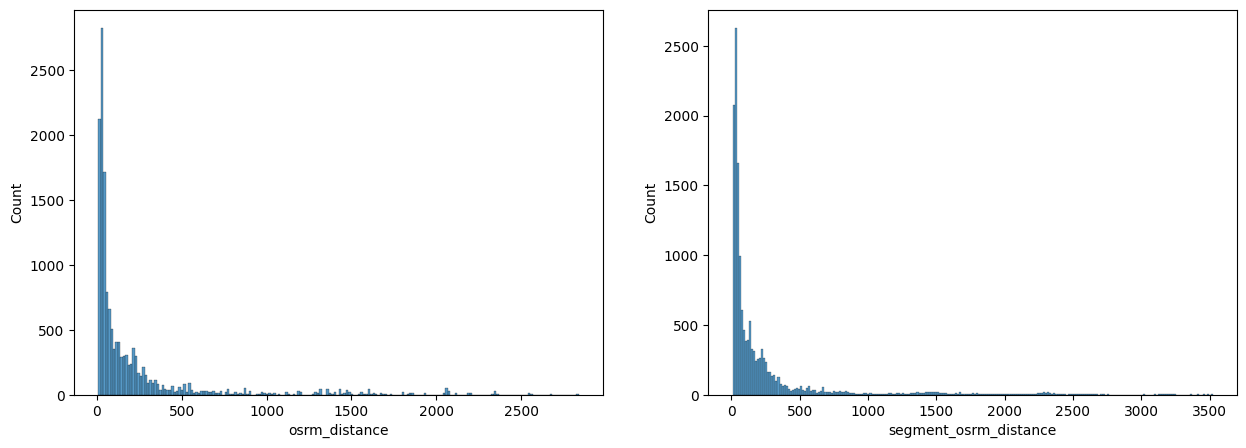

In [ ]:
# Visual distribution of osrm_distance to segment_osrm_distance
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df['osrm_distance'])

plt.subplot(1,2,2)
sns.histplot(data=df['segment_osrm_distance'])
plt.plot()

In [ ]:
# Check if the data is Gaussian Distribution or not using shapiro test
'''
Here we will use Shapiro test to check the gaussian distribution assuming that the data is independent and identically distributed

H0 = Data has Gaussian Distribution
H1 = Data does not have Gaussian Distribution
alpha = 0.05
'''
alpha=0.05

statistics_6,p_value_6= shapiro(df['osrm_distance'].sample(5000))

print('statistics=',statistics_6)
print('p_value=',p_value_6)

if p_value_3>alpha:
  print('The sample has Gaussian Distribution')
else:
  print('The sample does not have Gaussian Distribution')

statistics= 0.5215083360671997
p_value= 0.0
The sample does not have Gaussian Distribution


In [ ]:
alpha=0.05

statistics_7,p_value_7= shapiro(df['segment_osrm_distance'].sample(5000))

print('statistics=',statistics_7)
print('p_value=',p_value_7)

if p_value_7>alpha:
  print('The sample has Gaussian Distribution')
else:
  print('The sample does not have Gaussian Distribution')

statistics= 0.49944305419921875
p_value= 0.0
The sample does not have Gaussian Distribution


In [ ]:
# Check variance of the data
'''
We will use Levene Test to check the variance of the two dataset

H0 = Variances are equal
H1 = Variances are not equal
'''
alpha=0.05

statistics_var4,p_value_var4= levene(df['osrm_distance'], df['segment_osrm_distance'])

print('statistics=',statistics_var4)
print('p_value=',p_value_var4)

if p_value_var4>alpha:
  print('We fail to reject the null hypothesis. Hence, variances are equal')
else:
  print('Reject null hypothesis. Variances are not equal')

statistics= 13.640878396710558
p_value= 0.00022171213513990103
Reject null hypothesis. Variances are not equal


Since the distribution is not normal and the variance is not equal, we will use Mann-Whitney U rank test for the hypothesis testing

In [ ]:
# Mann-Whitney U Rank Test
'''
H0 = osrm_distance and segment_osrm_distance are the same
H1 = osrm_distance and segment_osrm_distance are different
alpha = 0.05

'''
from scipy.stats import mannwhitneyu

alpha=0.05

u_stat4,p_value_mann4= mannwhitneyu(df['osrm_distance'], df['segment_osrm_distance'])

print('statistics=',u_stat4)
print('p_value=',p_value_mann4)

if p_value_mann4>alpha:
  print('We fail to reject the null hypothesis. Hence, osrm_distance and segment_osrm_distance are the same')
else:
  print('We reject the null hypothesis. Hence, osrm_distance and segment_osrm_distance are different')

statistics= 105736776.0
p_value= 1.0001087659092072e-06
We reject the null hypothesis. Hence, osrm_distance and segment_osrm_distance are different


In the Mann Whitney U Test, the p_value is greater than the alpha value 0.05. Hence, we can conclude that the osrm_distance and segment_osrm_distance are different.

5. Compare osrm_time to segmen_osrm_time



*Here we set the null and alternate hypothesis as below:*

*H0 = osrm_time and segment_osrm_time are the same*

*H1 = osrm_time and segment_osrm_time are different*

*Let us assume the standard significance level for the hypothesis i.e., 5%*

[]

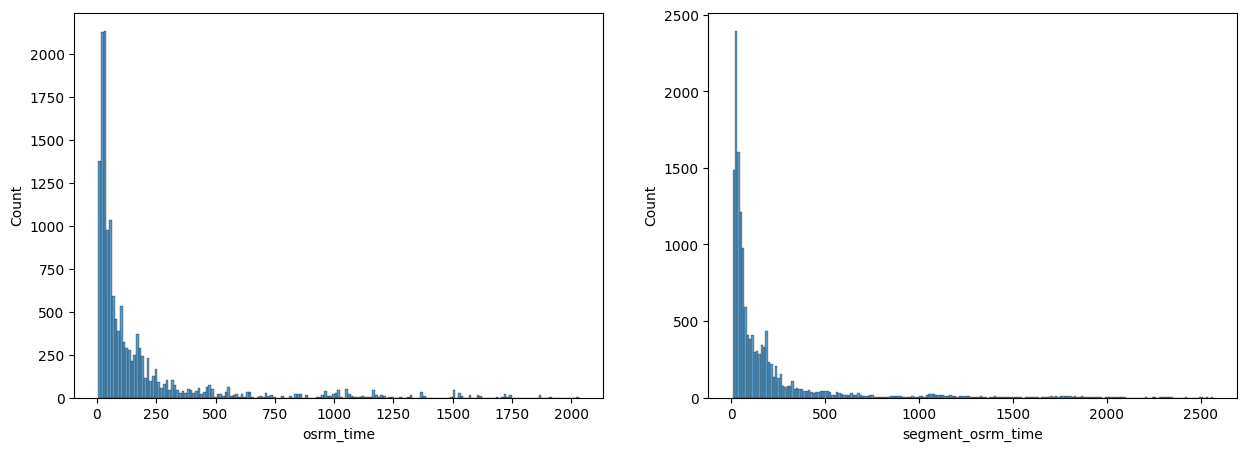

In [ ]:
# Visual distribution of osrm_time and segment_osrm_time
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df['osrm_time'])

plt.subplot(1,2,2)
sns.histplot(data=df['segment_osrm_time'])
plt.plot()

In [ ]:
# Check if the data is Gaussian Distribution or not using shapiro test
'''
Here we will use Shapiro test to check the gaussian distribution assuming that the data is independent and identically distributed

H0 = Data has Gaussian Distribution
H1 = Data does not have Gaussian Distribution
alpha = 0.05
'''
alpha=0.05

statistics_8,p_value_8= shapiro(df['osrm_time'].sample(5000))

print('statistics=',statistics_8)
print('p_value=',p_value_8)

if p_value_8>alpha:
  print('The sample has Gaussian Distribution')
else:
  print('The sample does not have Gaussian Distribution')

statistics= 0.5426640510559082
p_value= 0.0
The sample does not have Gaussian Distribution


In [ ]:
alpha=0.05

statistics_9,p_value_9= shapiro(df['segment_osrm_time'].sample(5000))

print('statistics=',statistics_9)
print('p_value=',p_value_9)

if p_value_9>alpha:
  print('The sample has Gaussian Distribution')
else:
  print('The sample does not have Gaussian Distribution')

statistics= 0.5383963584899902
p_value= 0.0
The sample does not have Gaussian Distribution


In [ ]:
# Check variance of the data
'''
We will use Levene Test to check the variance of the two dataset

H0 = Variances are equal
H1 = Variances are not equal
'''
alpha=0.05

statistics_var5,p_value_var5= levene(df['osrm_time'], df['segment_osrm_time'])

print('statistics=',statistics_var5)
print('p_value=',p_value_var5)

if p_value_var5>alpha:
  print('We fail to reject the null hypothesis. Hence, variances are equal')
else:
  print('Reject null hypothesis. Variances are not equal')

statistics= 28.53905343143278
p_value= 9.250556006347759e-08
Reject null hypothesis. Variances are not equal


Since the distribution is not normal and the variance is not equal, we will use Mann-Whitney U rank test for the hypothesis testing

In [ ]:
# Mann-Whitney U Rank Test
'''
H0 = osrm_time and segment_osrm_time are the same
H1 = osrm_time and segment_osrm_time are different
alpha = 0.05

'''
from scipy.stats import mannwhitneyu

alpha=0.05

u_stat5,p_value_mann5= mannwhitneyu(df['osrm_time'], df['segment_osrm_time'])

print('statistics=',u_stat5)
print('p_value=',p_value_mann5)

if p_value_mann5>alpha:
  print('We fail to reject the null hypothesis. Hence, actual_time and osrm_time are the same')
else:
  print('We reject the null hypothesis. Hence, actual_time and osrm_time are different')

statistics= 105235964.5
p_value= 2.4893531591323577e-08
We reject the null hypothesis. Hence, actual_time and osrm_time are different


In the Mann Whitney U Test, the p_value is greater than the alpha value 0.05. Hence, we can conclude that the osrm_time and segment_osrm_time are different.

# Hot Encoding

In [ ]:
# Hot encoding for data
df['data_encode']=df['data'].map({'test': 0, 'training': 1})
df['data_encode'].value_counts()

1    10645
0     4142
Name: data_encode, dtype: int64

In [ ]:
# Hot encoding for route_type
df['route_type_encode']=df['route_type'].map({'FTL': 0, 'Carting': 1})
df['route_type_encode'].value_counts()

1    8906
0    5881
Name: route_type_encode, dtype: int64

# Normalize/Standardize the numerical feature using MinMaxScaler or StandardScaler

In [ ]:
num_col=['start_scan_to_end_scan', 'od_total_time', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time','segment_osrm_distance']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(df[num_col])
df[num_col]= scaler.transform(df[num_col])
df[num_col]

,start_scan_to_end_scan,od_total_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2.627598,2.627300,2.162548,2.147277,2.048290,2.125107,2.147833,2.629714,2.633597
1,-0.530859,-0.529628,-0.297563,-0.379887,-0.342571,-0.320538,-0.381163,-0.367090,-0.332307
2,5.170772,5.170234,5.772034,5.326268,5.816936,5.802622,5.311326,5.594737,5.571936
3,-0.652397,-0.652837,-0.480911,-0.529486,-0.537818,-0.497115,-0.528553,-0.522809,-0.486596
4,0.284962,0.285584,-0.119943,-0.027259,-0.162059,-0.154082,-0.023473,-0.208192,-0.182120
...,...,...,...,...,...,...,...,...,...
14782,-0.413880,-0.413558,-0.348054,-0.486744,-0.364674,-0.351972,-0.487212,-0.376623,-0.378690
14783,-0.713166,-0.713439,-0.486350,-0.597162,-0.548870,-0.506808,-0.596856,-0.538699,-0.495684
14784,-0.164728,-0.164330,-0.410502,-0.132335,-0.416249,-0.391263,-0.129522,-0.293997,-0.282653
14785,-0.277150,-0.276117,-0.096128,-0.164392,0.066344,-0.088455,-0.170863,0.128670,0.001984


#Insights:



*   Initially, we had 144867 rows and 24 columns. After merging and aggregating the trips and other columns, the final row count was 14787.

*   We had 293 null values in the source name and 261 destination name. Since these are small in number, we can remove it. We also removed some unknown fields.


*   On average, there are 1485 outliers in every numerical column. We haven't removed it as these are high in number. We will have to look indepth to decide the final procedure to deal with these outliers.

*   72% of the data is training data and remaining 28% of the data is the test data.

*   We have 8906 trips of carting route and 5881 trips for FTL Route type.

*   The top 3 states where the trip started ended were Mahrashtra, Karnataka and Haryana. We have strong buyer and seller presence in these states.

*   The top 3 cities where the trip started and ended were Bengaluru, Mumbai and Gurgaon. We have strong buyer and seller presence in these cities.


*   We have data only from September and October month of 2018, September has the highest numbers of trip(13011).


*   The number of trips are lowest in the afternoon and maximum after 10 pm to midnight.


*   Time taken to deliver the package and and total time of the trip are the same.

*   The actual time taken to complete the trip is different from the estimated time.

*   The actual time and the segment's actual time are same as per the hypothesis testing.
*   The system-generated estimated distance and system-generated segment's distance are different.

*   The system-generated time and system-generated segment time are different.







# Recomendations:

*   OSRM estimates and the actual data of the attributes are very different.
*   We need to optimize our routes and reduce the delivery time to provide better services to customers.

*   The top 3 states that have contributed to most of the trips i.e., Maharashtra, Karnataka and Haryana are very important for the business. We can further improve our network and try and deliver faster may be as per the actual time.

*   We can see that the trips are divided into multiple sub-trips. We should try and reduce this in order to save our time.

*   We should also plan our routes keeping in mind the traffic in cities and festival seasons. Festive seasons can bring in more and more orders along with the traffic issues.

*   Lastly, we have only 2 months of data for the analysis. It will be very difficult to conclude anything with much confidence with this small amount of data as this does not include seasonality, holidays, festivals etc. We will need more data to be sure of any conclusion and me better plan.
